# Imports

In [10]:
import pandas as pd
import numpy as np

from ipynb.fs.full.utility_functions import (
    get_price_data,
    get_strategy_stats,
    get_alpha_beta_to_asset,
    find_cointegrated_pairs,
)
from datetime import datetime
from enum import Enum

# Price Data Collection

In [4]:
univ = [
    "BTCUSDT", "ETHUSDT", "ADAUSDT", "BNBUSDT", "XRPUSDT", "DOTUSDT", "MATICUSDT", "LTCUSDT", "BCHUSDT",
    "LINKUSDT", "XLMUSDT", "USDCUSDT", "EOSUSDT", "TRXUSDT", "XTZUSDT", "FILUSDT", "NEOUSDT", "DAIUSDT",
    "DASHUSDT", "VETUSDT", "ATOMUSDT", "AAVEUSDT", "UNIUSDT", "GRTUSDT", "THETAUSDT", "IOTAUSDT", "BUSDUSDT",
    "ZECUSDT", "YFIUSDT", "ETCUSDT", "WAVESUSDT", "COMPUSDT", "SNXUSDT", "DOGEUSDT", "MKRUSDT", "ZILUSDT",
    "SUSHIUSDT", "KSMUSDT", "OMGUSDT", "ONTUSDT", "ALGOUSDT", "EGLDUSDT", "BATUSDT", "DGBUSDT", "ZRXUSDT",
    "TUSDUSDT", "QTUMUSDT", "ICXUSDT", "AVAXUSDT", "RENUSDT", "HBARUSDT", "NEARUSDT", "LRCUSDT", "CELOUSDT",
    "KNCUSDT", "LSKUSDT", "OCEANUSDT", "QNTUSDT", "USTUSDT", "BANDUSDT", "MANAUSDT", "ENJUSDT", "ANTUSDT",
    "BNTUSDT", "ZENUSDT", "NMRUSDT", "RVNUSDT", "IOSTUSDT", "OXTUSDT", "CRVUSDT", "MATICUSDT", "HNTUSDT",
    "BALUSDT", "CHZUSDT"
]

px_4h = get_price_data(univ, '4h', True, './class_project_input_prices.csv')
px_4h

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,MATICUSDT,HNTUSDT,BALUSDT,CHZUSDT
open_time,,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,23353.97,646.62,0.16284,32.9681,0.56944,NaN,NaN,117.34,313.46,NaN,...,12.056,NaN,NaN,NaN,0.2492,NaN,NaN,1.41095,NaN,NaN
2020-12-20 04:00:00,23604.24,655.23,0.16638,33.6559,0.57916,NaN,NaN,121.30,340.00,NaN,...,12.107,NaN,NaN,NaN,0.2477,NaN,NaN,1.43156,NaN,NaN
2020-12-20 08:00:00,23549.50,652.88,0.16463,34.8228,0.57948,NaN,NaN,118.09,349.70,NaN,...,12.237,NaN,NaN,NaN,0.2477,NaN,NaN,1.44273,NaN,NaN
2020-12-20 12:00:00,23880.85,653.24,0.16542,35.0120,0.57798,NaN,NaN,119.10,361.21,NaN,...,12.074,NaN,NaN,NaN,0.2533,NaN,NaN,1.47130,NaN,NaN
2020-12-20 16:00:00,23932.71,649.82,0.16502,34.7042,0.57306,NaN,NaN,116.60,357.09,NaN,...,12.008,NaN,NaN,NaN,0.2503,NaN,NaN,1.43083,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,108921.64,4352.10,0.81950,856.7600,2.80720,3.816,NaN,110.23,542.00,23.36,...,7.240,16.62,0.01323,0.00342,0.0535,0.7646,NaN,NaN,NaN,0.03830
2025-08-30 20:00:00,108569.75,4374.56,0.82170,862.6200,2.81940,3.773,NaN,110.77,552.90,23.47,...,7.240,15.16,0.01323,0.00342,0.0535,0.7646,NaN,NaN,NaN,0.03830
2025-08-31 00:00:00,109155.73,4486.79,0.83590,863.4900,2.85180,3.867,NaN,111.67,551.30,23.90,...,7.240,15.21,0.01353,0.00342,0.0535,0.7936,NaN,NaN,NaN,0.04045


In [11]:
# def calculate_covariance_directly(ser_1, ser_2):
#     available_1 = ser_1.notna()
#     available_2 = ser_2.notna()
    
#     common_1 = ser_1[available_1][available_2]
#     common_2 = ser_2[available_1][available_2]
    
#     if common_1.shape[0] <= 1 or common_2.shape[0] <= 1:
#         return np.nan
    
#     mean_1 = common_1.mean()
#     demeaned_1 = common_1 - mean_1
    
#     mean_2 = common_2.mean()
#     demeaned_2 = common_2 - mean_2
    
#     return (demeaned_1 * demeaned_2).sum() / (demeaned_1.shape[0] - 1)


# # returns pair in the form of (alpha, beta); nan values in dependent_series or independent_series are ignored;
# # neither can contain inf
# def get_alpha_beta_to_asset(dependent_series, independent_series):
#     cov = calculate_covariance_directly(dependent_series, independent_series)
    
#     non_na_dependent_series = dependent_series[dependent_series.notna() & independent_series.notna()]
#     non_na_independent_series = independent_series[
#         dependent_series.notna() & independent_series.notna()]
    
#     if len(non_na_independent_series) == 0:
#         return np.nan, np.nan
    
#     #print(f"\ncov: {cov}")
#     #print(f"var: {non_na_independent_series.var()}\n")
    
#     beta = cov / non_na_independent_series.var()
#     alpha = (non_na_dependent_series - non_na_independent_series * beta).mean()
#     return alpha, beta

In [8]:
class CointIdMethod(Enum):
    FIXED_TIME = 1
    EVERY_SIX_MONTHS = 2
    EVERY_THREE_MONTHS = 3


freq_to_px = {
    4: px_4h,
    8: px_4h.loc[pd.date_range(px_4h.index[0], px_4h.index[-1], freq='8h').drop(datetime(2023, 2, 6, 8, 0))],
    12: px_4h.loc[pd.date_range(px_4h.index[0], px_4h.index[-1], freq='12h')],
    24: px_4h.loc[pd.date_range(px_4h.index[0], px_4h.index[-1], freq='24h')],
    48: px_4h.loc[pd.date_range(px_4h.index[0], px_4h.index[-1], freq='48h')],
}


def get_fixed_time_to_coint_pairs(px_coint, px_trade_sim, significance_level):
    pvalue_matrix, pairs = find_cointegrated_pairs(px_coint, significance_level)
    pairs_without_pvalue = [(coin_1, coin_2) for (coin_1, coin_2, pvalue) in pairs]
    
    time_to_coint_pairs = dict()
    for index in range(len(px_trade_sim)):
        time_index = px_trade_sim.index[index]
        time_to_coint_pairs[time_index] = pairs_without_pvalue
    return time_to_coint_pairs


def get_time_to_coint_pairs_at_freq(px_full_sim, px_trade_sim, significance_level, recalc_freq):
    pre_px_coint = px_full_sim.loc[:px_trade_sim.index[0]].iloc[:-1]

    pvalue_matrix, pre_period_pairs_with_pvalues = find_cointegrated_pairs(pre_px_coint, significance_level)
    current_coint_pairs = [(coin_1, coin_2) for (coin_1, coin_2, pvalue) in pre_period_pairs_with_pvalues]

    time_to_coint_pairs = dict()

    recalculation_points = pd.date_range(px_trade_sim.index[0], px_trade_sim.index[-1], freq = recalc_freq)
    recalculation_index = 1

    for index in range(len(px_trade_sim)):
        time_index = px_trade_sim.index[index]

        if ((recalculation_index < len(recalculation_points)) and \
            (time_index >= recalculation_points[recalculation_index])):
            start_time = recalculation_points[recalculation_index - 1]
            end_time = recalculation_points[recalculation_index]

            _, pairs_with_pvalues = find_cointegrated_pairs(px_trade_sim.loc[start_time:end_time].iloc[:-1],
                                                            significance_level)
            current_coint_pairs = [(coin_1, coin_2) for (coin_1, coin_2, pvalue) in pairs_with_pvalues]
            recalculation_index += 1

        time_to_coint_pairs[time_index] = current_coint_pairs

    return time_to_coint_pairs


# return map from times in px_full_sim to a set of cointegrated pairs at that time and price dataframe to
# trade during
def get_cointegrated_pairs(px_full_sim, cointegration_identification_method, significance_level):
    trade_period_start = datetime(2022, 1, 1, 0, 0)
    px_trade_sim = px_full_sim.loc[trade_period_start:]
    
    if cointegration_identification_method == CointIdMethod.FIXED_TIME:
        px_coint = px_full_sim.loc[:trade_period_start].iloc[:-1]
        time_to_coint_pairs = get_fixed_time_to_coint_pairs(px_coint, px_trade_sim, significance_level)
        return time_to_coint_pairs, px_trade_sim
    elif cointegration_identification_method == CointIdMethod.EVERY_SIX_MONTHS:
        time_to_coint_pairs = get_time_to_coint_pairs_at_freq(
            px_full_sim,
            px_trade_sim,
            significance_level,
            '6MS'
        )
        return time_to_coint_pairs, px_trade_sim
    elif cointegration_identification_method == CointIdMethod.EVERY_THREE_MONTHS:
        time_to_coint_pairs = get_time_to_coint_pairs_at_freq(
            px_full_sim,
            px_trade_sim,
            significance_level,
            '3MS'
        )
        return time_to_coint_pairs, px_trade_sim
    else:
        time_to_coint_pairs = dict()
        for time_index in px_trade_sim.index:
            time_to_coint_pairs[time_index] = set()
        return time_to_coint_pairs, px_trade_sim



def get_spread_and_beta(index, px_for_spread, coin_a, coin_b, beta_calculation_window):
    lookback_period = px_for_spread.iloc[(index - beta_calculation_window):index]
    _, beta = get_alpha_beta_to_asset(lookback_period[coin_a], lookback_period[coin_b])
    if beta == np.nan or beta == float('inf') or beta == float('-inf'):
        return np.nan, 0.0
    
    return (px_for_spread.iloc[index][coin_a] - beta * px_for_spread.iloc[index][coin_b]), beta


# Get the z-score of the spread between coint_coin_a and coint_coin_b for the closing price
# for the period starting at open_time using a lookback window of beta_calculation_window
# periods to calculate beta for each time step. Calculate the z-score for the spread values
# over z_score_calculation_window periods
def get_spread_z_score(
    coint_coin_a,
    coint_coin_b,
    px_trade_sim,
    open_time,
    beta_calculation_window,
    z_score_calculation_window,
):
    px_for_z_calc = px_trade_sim.loc[:open_time, [coint_coin_a, coint_coin_b]]
    spreads = pd.Series(0.0)
    
    for index in range(max(len(px_for_z_calc) - z_score_calculation_window - 1, 0), len(px_for_z_calc)):
        time_index = px_for_z_calc.index[index]
        current_spread, current_beta = get_spread_and_beta(index, px_for_z_calc, coint_coin_a, coint_coin_b, beta_calculation_window)
        spreads[index] = current_spread
    
    if len(spreads) <= 4:
        return 0.0, current_beta
    else:
        return (spreads.iloc[-1] - spreads.iloc[:-1].mean()) / spreads.iloc[:-1].std(), current_beta


def has_coint_pair_reached_exit_threshold(
    coint_coin_a,
    coint_coin_b,
    hold_status,
    px_trade_sim,
    open_time,
    beta_calculation_window,
    z_score_calculation_window,
    z_score_exit_level
):
    z_score, _ = get_spread_z_score(
        coint_coin_a,
        coint_coin_b,
        px_trade_sim,
        open_time,
        beta_calculation_window,
        z_score_calculation_window
    )
    
    if hold_status == "SHORT" and z_score < z_score_exit_level:
        return True
    elif hold_status == "LONG" and z_score > -z_score_exit_level:
        return True
    
    return False


def has_coint_pair_reached_entry_threshold(
    coint_coin_a,
    coint_coin_b,
    px_trade_sim,
    open_time,
    beta_calculation_window,
    z_score_calculation_window,
    z_score_entry_level
):
    z_score, current_beta = get_spread_z_score(
        coint_coin_a,
        coint_coin_b,
        px_trade_sim,
        open_time,
        beta_calculation_window,
        z_score_calculation_window
    )
    
    if z_score >= z_score_entry_level:
        return "SHORT", current_beta
    elif z_score <= -z_score_entry_level:
        return "LONG", current_beta
    else:
        return "NOTHING", 0.0


# return gross returns and net returns
def run_trade_simulation(
    px_trade_sim,
    trade_hours_freq,
    time_to_coint_pairs,
    beta_calculation_window,
    z_score_calculation_window,
    z_score_entry_level,
    z_score_exit_level
):
    share_positions = pd.DataFrame(0.0, columns = px_trade_sim.columns, index = px_trade_sim.index)
    pairs_currently_held = dict()
    money_earned = pd.Series(0.0, index = px_trade_sim.index)
    
    for index in range(len(px_trade_sim)):
        open_time = px_trade_sim.index[index]        
        pairs_to_remove_from_holdings = set()
        
        if open_time.day == 1:
            print(open_time)
        
        if index > 0:
            share_positions.iloc[index] = share_positions.iloc[index-1]
        
        for (coint_coin_a, coint_coin_b, hold_status), (share_size_a, share_size_b) in pairs_currently_held.items():
            
            # return true if the closing price for the period is within the threshold
            if has_coint_pair_reached_exit_threshold(
                coint_coin_a,
                coint_coin_b,
                hold_status,
                px_trade_sim,
                open_time,
                beta_calculation_window,
                z_score_calculation_window,
                z_score_exit_level
            ):  
                share_positions.loc[open_time, coint_coin_a] -= share_size_a
                share_positions.loc[open_time, coint_coin_b] -= share_size_b
                pairs_to_remove_from_holdings.add((coint_coin_a, coint_coin_b, hold_status))
                
                money_earned[open_time] += px_trade_sim.loc[open_time, coint_coin_a] * share_size_a
                money_earned[open_time] += px_trade_sim.loc[open_time, coint_coin_b] * share_size_b
        
        for entry in pairs_to_remove_from_holdings:
            del pairs_currently_held[entry]
        
        
        for (coint_coin_a, coint_coin_b) in time_to_coint_pairs[open_time]:
            
            # return BUY/SELL if the closing price for the period is beyond the threshold
            hold_status, beta = has_coint_pair_reached_entry_threshold(
                coint_coin_a,
                coint_coin_b,
                px_trade_sim,
                open_time,
                beta_calculation_window,
                z_score_calculation_window,
                z_score_entry_level
            )
            
            if hold_status == "LONG": # z_score(coint_coin_a - beta * coint_coin_b) < -entry_level
                raw_share_size_a = 1
                raw_share_size_b = -beta
                normalization_factor = abs(raw_share_size_a) + abs(raw_share_size_b)
                share_size_a = raw_share_size_a / normalization_factor
                share_size_b = raw_share_size_b / normalization_factor
                
                pairs_currently_held[(coint_coin_a, coint_coin_b, hold_status)] = (share_size_a, share_size_b)
                share_positions.loc[open_time, coint_coin_a] += share_size_a
                share_positions.loc[open_time, coint_coin_b] += share_size_b
                
                money_earned[open_time] -= px_trade_sim.loc[open_time, coint_coin_a] * share_size_a
                money_earned[open_time] -= px_trade_sim.loc[open_time, coint_coin_b] * share_size_b
                
            elif hold_status == "SHORT": # z_score(coint_coin_a - beta * coint_coin_b) > entry_level
                raw_share_size_a = -1
                raw_share_size_b = beta
                normalization_factor = abs(raw_share_size_a) + abs(raw_share_size_b)
                share_size_a = raw_share_size_a / normalization_factor
                share_size_b = raw_share_size_b / normalization_factor
                
                pairs_currently_held[(coint_coin_a, coint_coin_b, hold_status)] = (share_size_a, share_size_b)
                share_positions.loc[open_time, coint_coin_a] += share_size_a
                share_positions.loc[open_time, coint_coin_b] += share_size_b
                
                money_earned[open_time] -= px_trade_sim.loc[open_time, coint_coin_a] * share_size_a
                money_earned[open_time] -= px_trade_sim.loc[open_time, coint_coin_b] * share_size_b
    
    open_dollar_positions = px_trade_sim * share_positions
    
    # total dollar balance is at the end of the period starting at the index
    total_dollar_balance = open_dollar_positions.sum(axis=1) + money_earned
    
    gross_returns = total_dollar_balance / total_dollar_balance.shift() - 1
    
    turnover = (open_dollar_positions.fillna(0) - open_dollar_positions.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20 # (commission + slippage)
    net_returns = gross_returns.subtract(turnover * tcost_bps * 1e-4, fill_value = 0)
    
    return gross_returns, net_returns


def get_string_enum(cointegration_identification_method):
    if cointegration_identification_method == CointIdMethod.FIXED_TIME:
        return "FIXED_TIME"
    elif cointegration_identification_method == CointIdMethod.EVERY_SIX_MONTHS:
        return "EVERY_SIX_MONTHS"
    elif cointegration_identification_method == CointIdMethod.EVERY_THREE_MONTHS:
        return "EVERY_THREE_MONTHS"
    else:
        return ""


# construct file names for gross returns and net returns
def construct_file_names(
    trade_hours_freq,
    cointegration_identification_method,
    significance_level,
    beta_calculation_window,
    z_score_calculation_window,
    z_score_entry_level,
    z_score_exit_level
):
    t = str(trade_hours_freq)
    c = get_string_enum(cointegration_identification_method)
    s = str(significance_level)
    b = str(beta_calculation_window)
    z = str(z_score_calculation_window)
    n = str(z_score_entry_level)
    x = str(z_score_exit_level)
    return (
        f"simulation_data/gross_rets_{t}_{c}_{s}_{b}_{z}_{n}_{x}",
        f"simulation_data/net_rets_{t}_{c}_{s}_{b}_{z}_{n}_{x}"
    )


def construct_variant_key(
    trade_hours_freq,
    cointegration_identification_method,
    significance_level,
    beta_calculation_window,
    z_score_calculation_window,
    z_score_entry_level,
    z_score_exit_level
):
    return (
        trade_hours_freq,
        get_string_enum(cointegration_identification_method),
        significance_level,
        beta_calculation_window,
        z_score_calculation_window,
        z_score_entry_level,
        z_score_exit_level
    )

In [60]:
results = dict()

for trade_hours_freq in (4, 8, 12, 24, 48):
    px_full_sim = freq_to_px[trade_hours_freq]

    for cointegration_identification_method in (
        CointIdMethod.FIXED_TIME, CointIdMethod.EVERY_SIX_MONTHS, CointIdMethod.EVERY_THREE_MONTHS
    ):
        for significance_level in (1e-8, 1e-6, 1e-4, 0.01, 0.02, 0.05):
            time_to_coint_pairs, px_trade_sim = get_cointegrated_pairs(
                px_full_sim,
                cointegration_identification_method,
                significance_level
            )
            
            for beta_calculation_window in (
                int(24 / trade_hours_freq * 7),
                int(24 / trade_hours_freq * 7 * 2),
                int(24 / trade_hours_freq * 7 * 5),
                int(24 / trade_hours_freq * 7 * 10),
                int(24 / trade_hours_freq * 7 * 20),
                int(24 / trade_hours_freq * 7 * 40),
                int(24 / trade_hours_freq * 7 * 80),
            ):
                for z_score_calculation_window in (
                    int(24 / trade_hours_freq * 7),
                    int(24 / trade_hours_freq * 7 * 2),
                    int(24 / trade_hours_freq * 7 * 5),
                    int(24 / trade_hours_freq * 7 * 10),
                    int(24 / trade_hours_freq * 7 * 20),
                    int(24 / trade_hours_freq * 7 * 40),
                    int(24 / trade_hours_freq * 7 * 80),
                ):
                    for z_score_entry_level in (1.0, 1.5, 1.75, 2.0, 2.5, 3.0):
                        for z_score_exit_level in (
                            z_score_entry_level / 2,
                            z_score_entry_level - 1,
                            (z_score_entry_level - 1) / 2
                        ):
                            variant_key = construct_variant_key(
                                trade_hours_freq,
                                cointegration_identification_method,
                                significance_level,
                                beta_calculation_window,
                                z_score_calculation_window,
                                z_score_entry_level,
                                z_score_exit_level
                            )
                            
                            print(f"Before calculation, key: {variant_key}")
                            
                            gross_returns, net_returns = run_trade_simulation(
                                px_trade_sim,
                                trade_hours_freq,
                                time_to_coint_pairs,
                                beta_calculation_window,
                                z_score_calculation_window,
                                z_score_entry_level,
                                z_score_exit_level
                            )
                            
                            print(f"After calculation, key: {variant_key}")

                            gross_ret_file_name, net_ret_file_name = construct_file_names(
                                trade_hours_freq,
                                cointegration_identification_method,
                                significance_level,
                                beta_calculation_window,
                                z_score_calculation_window,
                                z_score_entry_level,
                                z_score_exit_level
                            )

                            gross_returns.to_csv(gross_ret_file_name)
                            net_returns.to_csv(net_ret_file_name)

                            results[variant_key] = get_strategy_stats(net_returns, trade_hours_freq, px_trade_sim)

results_df = pd.DataFrame(results)

2022-01-01 12:00:00
2022-01-01 16:00:00
2022-01-01 20:00:00
2022-01-02 00:00:00
2022-01-02 04:00:00
2022-01-02 08:00:00
2022-01-02 12:00:00
2022-01-02 16:00:00
2022-01-02 20:00:00
2022-01-03 00:00:00
2022-01-03 04:00:00
2022-01-03 08:00:00
2022-01-03 12:00:00
2022-01-03 16:00:00
2022-01-03 20:00:00
2022-01-04 00:00:00
2022-01-04 04:00:00
2022-01-04 08:00:00
2022-01-04 12:00:00
2022-01-04 16:00:00
2022-01-04 20:00:00
2022-01-05 00:00:00
2022-01-05 04:00:00
2022-01-05 08:00:00
2022-01-05 12:00:00
2022-01-05 16:00:00
2022-01-05 20:00:00
2022-01-06 00:00:00


KeyboardInterrupt: 

In [ ]:
trade_hours_freq = 24
px_full_sim = freq_to_px[trade_hours_freq]
cointegration_identification_method = CointIdMethod.EVERY_SIX_MONTHS
significance_level = 1e-2

time_to_coint_pairs, px_trade_sim = get_cointegrated_pairs(
    px_full_sim,
    cointegration_identification_method,
    significance_level
)

In [71]:
time_to_coint_pairs[datetime(2024, 1, 1, 0, 0)]

[('ETHUSDT', 'GRTUSDT'),
 ('ETHUSDT', 'THETAUSDT'),
 ('ETHUSDT', 'ZILUSDT'),
 ('ETHUSDT', 'EGLDUSDT'),
 ('ETHUSDT', 'BATUSDT'),
 ('ETHUSDT', 'OCEANUSDT'),
 ('ETHUSDT', 'MANAUSDT'),
 ('ADAUSDT', 'IOTAUSDT'),
 ('ADAUSDT', 'ALGOUSDT'),
 ('BNBUSDT', 'FILUSDT'),
 ('BNBUSDT', 'LRCUSDT'),
 ('BNBUSDT', 'CELOUSDT'),
 ('BNBUSDT', 'QNTUSDT'),
 ('XRPUSDT', 'COMPUSDT'),
 ('DOTUSDT', 'IOTAUSDT'),
 ('DOTUSDT', 'KSMUSDT'),
 ('DOTUSDT', 'LRCUSDT'),
 ('DOTUSDT', 'CELOUSDT'),
 ('MATICUSDT', 'XTZUSDT'),
 ('MATICUSDT', 'FILUSDT'),
 ('MATICUSDT', 'ETCUSDT'),
 ('MATICUSDT', 'WAVESUSDT'),
 ('MATICUSDT', 'ZILUSDT'),
 ('MATICUSDT', 'ONTUSDT'),
 ('MATICUSDT', 'QTUMUSDT'),
 ('MATICUSDT', 'RENUSDT'),
 ('MATICUSDT', 'MANAUSDT'),
 ('MATICUSDT', 'CHZUSDT'),
 ('LTCUSDT', 'COMPUSDT'),
 ('LTCUSDT', 'CRVUSDT'),
 ('LINKUSDT', 'ZRXUSDT'),
 ('USDCUSDT', 'EOSUSDT'),
 ('USDCUSDT', 'XTZUSDT'),
 ('USDCUSDT', 'FILUSDT'),
 ('USDCUSDT', 'NEOUSDT'),
 ('USDCUSDT', 'DAIUSDT'),
 ('USDCUSDT', 'DASHUSDT'),
 ('USDCUSDT', 'VETUSDT'),
 ('U

In [ ]:
trade_hours_freq = 4
beta_calculation_window = 4 * 6 * trade_hours_freq
z_score_calculation_window = 8 * 6 * trade_hours_freq

z_score_entry_level = 2.0
z_score_exit_level = 0.75

gross_returns, net_returns = run_trade_simulation(
    px_trade_sim,
    trade_hours_freq,
    time_to_coint_pairs,
    beta_calculation_window,
    z_score_calculation_window,
    z_score_entry_level,
    z_score_exit_level
)

In [12]:
px_trade_sim = px_4h
trade_hours_freq = 4

time_to_coint_pairs = dict()
for time_index in px_trade_sim.index:
    time_to_coint_pairs[time_index] = [("DOTUSDT", "XLMUSDT")]

beta_calculation_window = 6 * 182
z_score_calculation_window = 6 * 45

z_score_entry_level = 1.75
z_score_exit_level = 0.75


gross_returns, net_returns = run_trade_simulation(
    px_trade_sim,
    trade_hours_freq,
    time_to_coint_pairs,
    beta_calculation_window,
    z_score_calculation_window,
    z_score_entry_level,
    z_score_exit_level
)

2021-01-01 00:00:00
2021-01-01 04:00:00
2021-01-01 08:00:00
2021-01-01 12:00:00
2021-01-01 16:00:00
2021-01-01 20:00:00
2021-02-01 00:00:00
2021-02-01 04:00:00
2021-02-01 08:00:00
2021-02-01 12:00:00
2021-02-01 16:00:00
2021-02-01 20:00:00
2021-03-01 00:00:00
2021-03-01 04:00:00
2021-03-01 08:00:00
2021-03-01 12:00:00
2021-03-01 16:00:00
2021-03-01 20:00:00
2021-04-01 00:00:00
2021-04-01 04:00:00
2021-04-01 08:00:00
2021-04-01 12:00:00
2021-04-01 16:00:00
2021-04-01 20:00:00
2021-05-01 00:00:00
2021-05-01 04:00:00
2021-05-01 08:00:00
2021-05-01 12:00:00
2021-05-01 16:00:00
2021-05-01 20:00:00
2021-06-01 00:00:00
2021-06-01 04:00:00
2021-06-01 08:00:00
2021-06-01 12:00:00
2021-06-01 16:00:00
2021-06-01 20:00:00
2021-07-01 00:00:00
2021-07-01 04:00:00
2021-07-01 08:00:00
2021-07-01 12:00:00
2021-07-01 16:00:00
2021-07-01 20:00:00
2021-08-01 00:00:00
2021-08-01 04:00:00
2021-08-01 08:00:00
2021-08-01 12:00:00
2021-08-01 16:00:00
2021-08-01 20:00:00
2021-09-01 00:00:00
2021-09-01 04:00:00


<Axes: xlabel='open_time'>

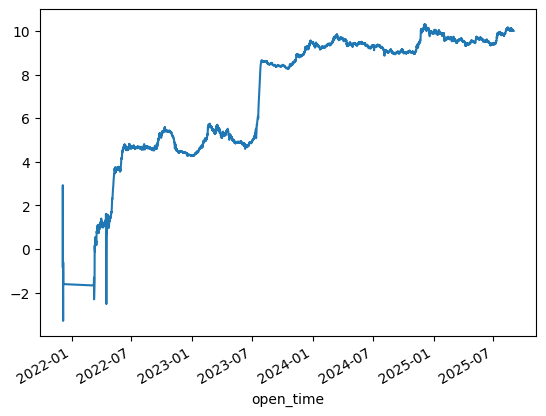

In [27]:
cleaned_gross_returns = gross_returns[
    ~((gross_returns == float('inf')) | np.isnan(gross_returns) | (gross_returns == float('-inf')))
]

cleaned_gross_returns.iloc[1:].cumsum().plot()

<Axes: xlabel='open_time'>

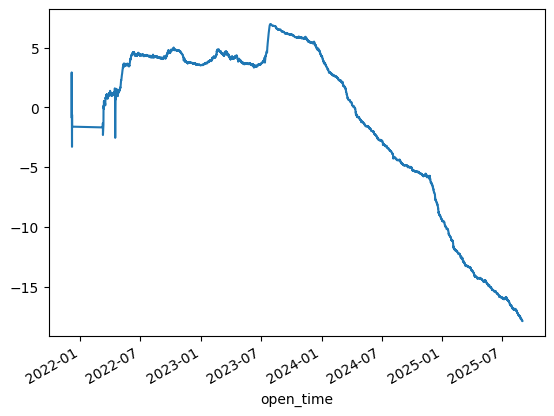

In [31]:
net_returns.loc[cleaned_gross_returns.index[1:]].cumsum().plot()